## Tic-Tac-Toe Agent

In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries

In [1]:
from TCGame_Env1 import TicTacToe
import collections
import numpy as np
import random
import pickle
import collections
from matplotlib import pyplot as plt
import time

In [2]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [3]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):

    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]]
    return valid_Actions

In [4]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)
    
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0

#### Epsilon-greedy strategy

In [5]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy
def epsilon_greedy(state, time):
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*time)
    # print(epsilon)
    z = np.random.random()
        
    if z > epsilon:
        state1 = Q_state(state)
        action = max(Q_dict[state1],key=Q_dict[state1].get)   #Exploitation: this gets the action corresponding to max q-value of current state
    else:
        possible_moves = [i for i in env.action_space(state)[0]]        
        action = possible_moves[np.random.choice(range(len(possible_moves)))]    #Exploration: randomly choosing and action
    
    return action

#### Tracking the state-action pairs for checking convergence

In [6]:
# Initialising Q_dictionary and States_tracked (for convergence)
Q_dict = collections.defaultdict(dict)
States_track =collections.defaultdict(dict)

In [7]:
# Initialising states to be tracked
def initialise_tracking_states():
    sample_q_values = [('x-x-x-x-x-x-x-x-x',(7,5)),('x-x-x-x-x-x-x-x-x',(2,9)),
                       ('x-2-x-x-1-x-x-x-x',(6,5)),('4-x-x-7-x-x-x-x-x',(1,1))]    #select any 4 Q-values
    for q_values in sample_q_values:
        state = q_values[0]
        action = q_values[1]
        States_track[state][action] = []

In [8]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [9]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action]) 

#### Define hyperparameters

In [10]:
#Defining parameters for the training

EPISODES = 10000
LR = 0.1                   # learning rate
GAMMA = 0.8                 # discount factor

max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.001        # epsilon decay rate
threshold = 200            # no of episodes after which states_tracked wwill be saved
policy_threshold = 300    # no of episodes after which Q dictionary/table will be saved

In [11]:
initialise_tracking_states()

In [12]:
start_time = time.time()

for episode in range(EPISODES):
    env = TicTacToe() # call the environment

    curr_state = env.state    
    terminal_s = False
    
    
    add_to_dict(curr_state)

    while terminal_s != True:  
        curr_state1 = Q_state(curr_state)
        curr_action = epsilon_greedy(curr_state, episode)
        
                

        next_state, reward, terminal_s = env.step(curr_state, curr_action)
        next_state1 = Q_state(next_state)
        add_to_dict(next_state)


        

            # UPDATE RULE
        if terminal_s != True:
            max_next = max(Q_dict[next_state1],key=Q_dict[next_state1].get)  
                #this gets the action corresponding to max q-value of next state
            Q_dict[curr_state1][curr_action] += LR * ((reward + (GAMMA*(Q_dict[next_state1][max_next])))
                                                      - Q_dict[curr_state1][curr_action] ) 

        else:
            Q_dict[curr_state1][curr_action] += LR * ((reward - Q_dict[curr_state1][curr_action]))


        curr_state = next_state
        
    if ((episode+1)%threshold)==0:
        save_tracking_states()
        save_obj(States_track,'States_tracked')
#         print(episode) 

    if ((episode+1)% policy_threshold) == 0:  #every 30000th episodes, the Q-dict will be saved
        save_obj(Q_dict,'Policy')  
        

elapsed_time = time.time() - start_time
save_obj(States_track,'States_tracked')   
save_obj(Q_dict,'Policy')

In [13]:
len(Q_dict)

30180

In [14]:
Q_dict

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 1): -0.9999999998941071,
              (0, 3): -0.9999999998941071,
              (0, 5): -0.9999999998941071,
              (0, 7): -0.9999999998941071,
              (0, 9): -0.9999999998941071,
              (1, 1): -0.9999999998940343,
              (1, 3): -0.9999999998941071,
              (1, 5): -0.9999999998941071,
              (1, 7): -0.9999999998941071,
              (1, 9): -0.9999999998941071,
              (2, 1): -0.9999999998941071,
              (2, 3): -0.9999999998941071,
              (2, 5): -0.9999999998831542,
              (2, 7): -0.9999999998941071,
              (2, 9): -0.9999999998941071,
              (3, 1): -0.9999999998941071,
              (3, 3): -0.9999999998941071,
              (3, 5): -0.9999999998941071,
              (3, 7): -0.9999999998941071,
              (3, 9): -0.9999999998941071,
              (4, 1): -0.9999999998941071,
              (4, 3): -0.9999999998941071,
              (

In [15]:
# Optimal move for the agent at the start 
max(Q_dict['x-x-x-x-x-x-x-x-x'],key=Q_dict['x-x-x-x-x-x-x-x-x'].get)

(8, 3)

<function matplotlib.pyplot.show(close=None, block=None)>

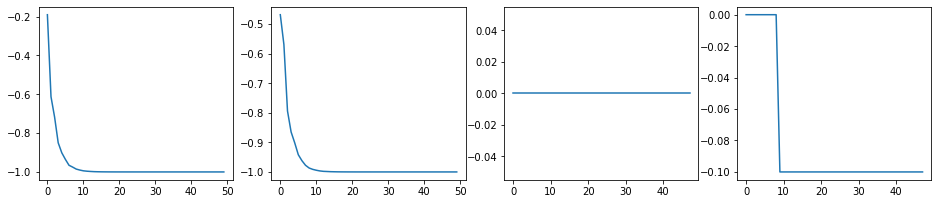

In [16]:
plt.figure(0, figsize=(16,7))

xaxis = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(7,5)])))
plt.subplot(241)
plt.plot(xaxis,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(7,5)]))
plt.show

xaxis = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(2,9)])))
plt.subplot(242)
plt.plot(xaxis,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(2,9)]))
plt.show

xaxis = np.asarray(range(0, len(States_track['x-2-x-x-1-x-x-x-x'][(6,5)])))
plt.subplot(243)
plt.plot(xaxis,np.asarray(States_track['x-2-x-x-1-x-x-x-x'][(6,5)]))
plt.show


xaxis = np.asarray(range(0, len(States_track['4-x-x-7-x-x-x-x-x'][(1,1)])))
plt.subplot(244)
plt.plot(xaxis,np.asarray(States_track['4-x-x-7-x-x-x-x-x'][(1,1)]))
plt.show



### Epsilon - decay check

In [17]:
time = np.arange(0,10000)
epsilon = []
for i in range(0,10000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.001*i))

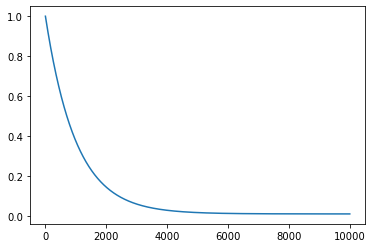

In [18]:
plt.plot(time, epsilon)
plt.show()